In [1]:
import os
import h5py
import quimb as qu
import pandas as pd
import quimb.tensor as qtn
import pickle
import numpy as np
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [16]:
def phase_diagram(cites, bond_dim, keep):

    path = f'/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={cites}_Bond={bond_dim}/kernel_partial_keep_from_{keep[0]}_to_{keep[-1]}'
    train_path = os.path.join(path, f'kernel_train_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5')
    test_path = os.path.join(path, f'kernel_test_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5')

    gtrain = h5py.File(train_path ,'r')['gram_train_DMRG_partial'][:]
    gtest = h5py.File(test_path ,'r')['gram_test_DMRG_partial'][:]   

    path = f'/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={cites}_Bond={bond_dim}/train_set_DMRG and tragets.pkl'

    with open(path, "rb") as f:
        target = pickle.load(f)[1]   

    clf = svm.SVC(kernel='precomputed')
    y = target
    clf.fit(gtrain, y) 
    y_pred = clf.predict(gtest)

    mat = y_pred.reshape(20,20) #   y = -1  Antiferromagnetic, y = 1  Paramagnetic, y = 0  SPT
    r = mat.shape[0]
    c = mat.shape[1]
    dy = 3.2/r
    dx = 1.6/c

    for i in range(r):
        for j in range(c):
            if mat[i,j] == 1:
                plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2,marker = 's', color = 'teal',s=320, edgecolors='none')
            elif mat[i,j] == 0:
                plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2,marker = 's', color ='gold',s =320,  edgecolors='none')
            elif mat[i,j] == -1:
                plt.scatter(i*(1.6/r)+dx/2,j*(3.2/c)+dy/2, marker = 's', color = 'darkviolet', s=320,  edgecolors='none')


    plt.xlim([0.0,1.6])
    plt.ylim([0.0,3.2])
    plt.xticks([0,0.8, 1.0 ,1.6])
    plt.yticks([0.0,1.6,3.2],[-1.6,0.0,1.6])
    plt.text(1.1,2,'Paramagnetic', fontsize = 10)
    plt.text(0.5,1.1,'SPT', fontsize = 10)
    plt.text(0.2,0.3,'Antiferomagnetic', fontsize = 10)

    h1_vals = [0.1000, 0.2556, 0.4111, 0.5667, 0.7222, 0.8778, 1.0333, 1.1889, 1.3444, 1.5000]
    anti_ferro_mag_boundary = np.array([-1.004, -1.0009, -1.024, -1.049, -1.079, -1.109, -1.154,  -1.225, -1.285, -1.35])+np.ones(10)*1.6
    para_mag_boundary = np.array([0.8439, 0.6636, 0.5033, 0.3631, 0.2229, 0.09766, -0.02755, -0.1377, -0.2479, -0.3531])+np.ones(10)*1.6

    plt.plot(h1_vals, anti_ferro_mag_boundary, "--", color = 'black', label="Antiferromagnetics")
    plt.plot(h1_vals, para_mag_boundary, "--", color = 'black', label="Paramagnetic")

    plt.xlabel('$h1$')
    plt.ylabel('$h2$')
    plt.savefig(f'phasediagram_{keep[0]}_to_{keep[-1]}_for_{cites}.png')

    plt.show()



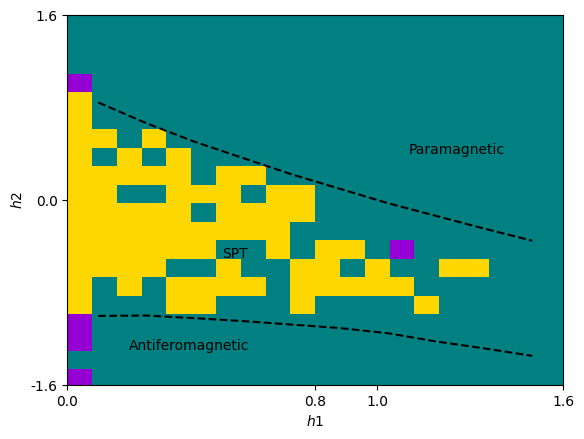

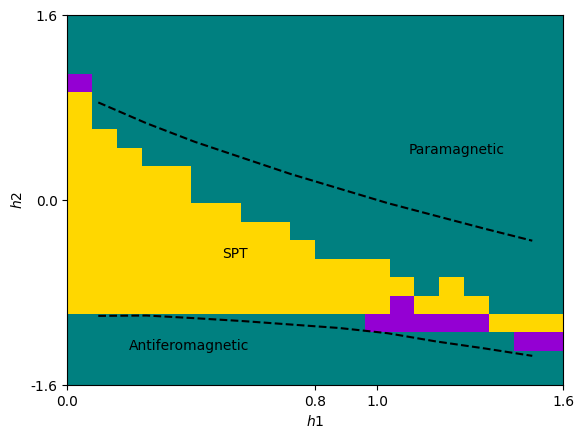

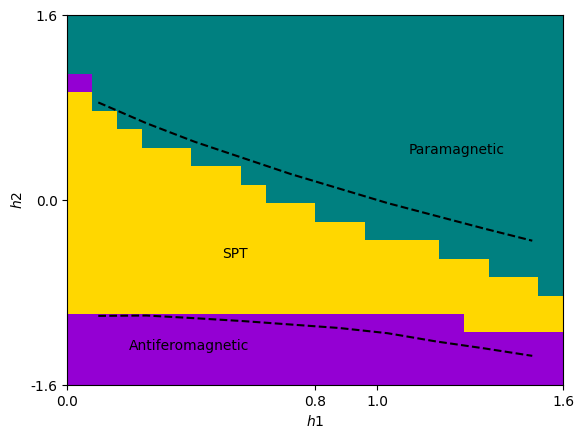

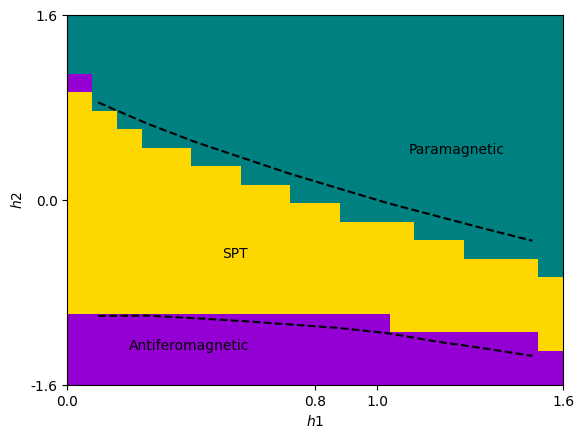

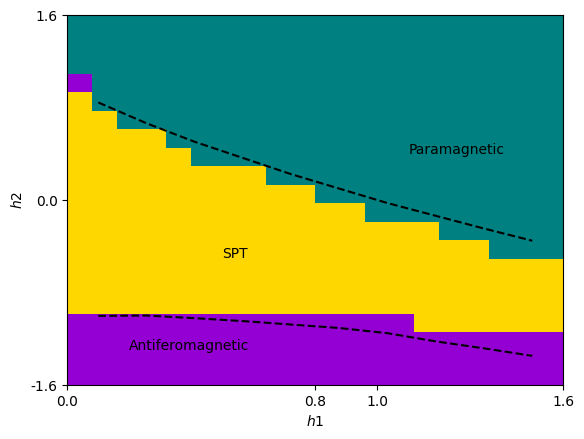

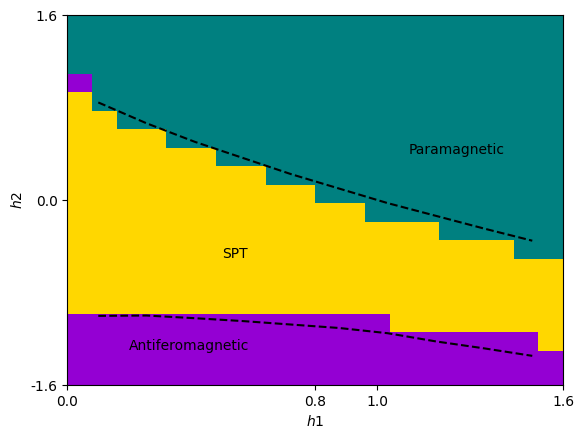

In [17]:
phase_diagram(cites=51, bond_dim=150, keep=[0])
phase_diagram(cites=51, bond_dim=150, keep=[0,1])
phase_diagram(cites=51, bond_dim=150, keep=[0,1,2])
phase_diagram(cites=51, bond_dim=150, keep=[0,1,2,3])
phase_diagram(cites=51, bond_dim=150, keep=[0,1,2,3,4])
phase_diagram(cites=51, bond_dim=150, keep=[0,1,2,3,4,5])

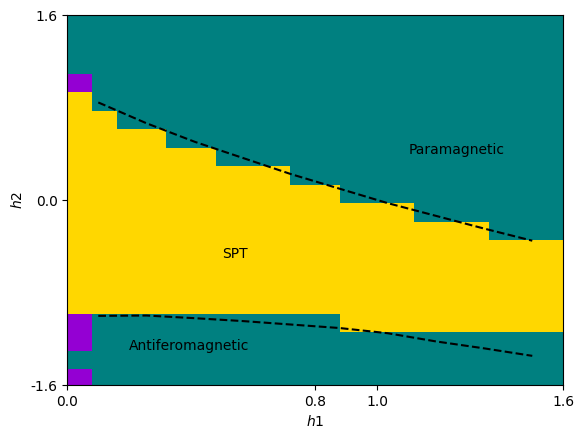

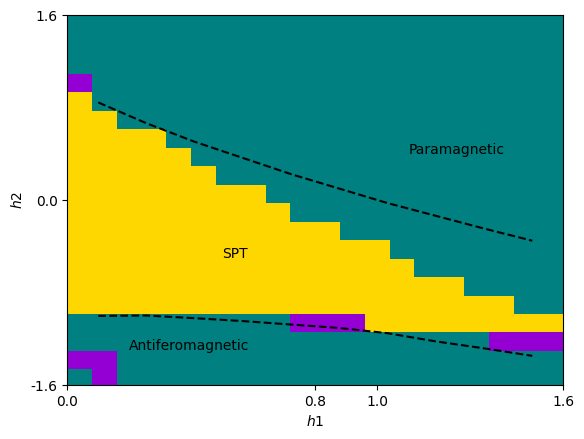

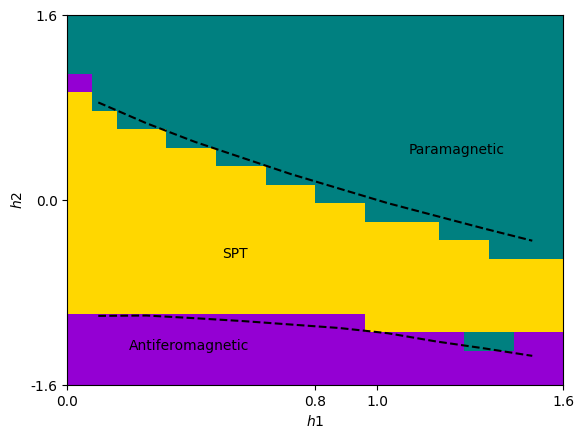

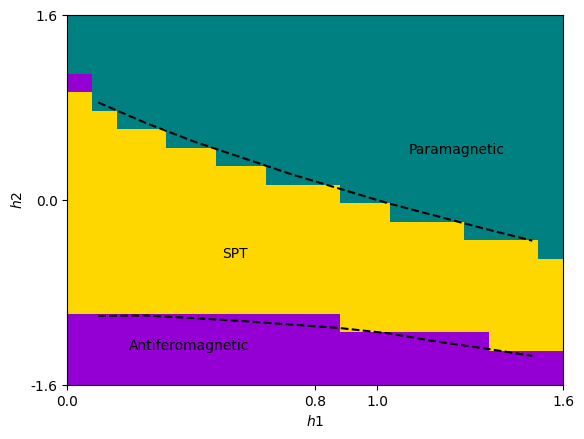

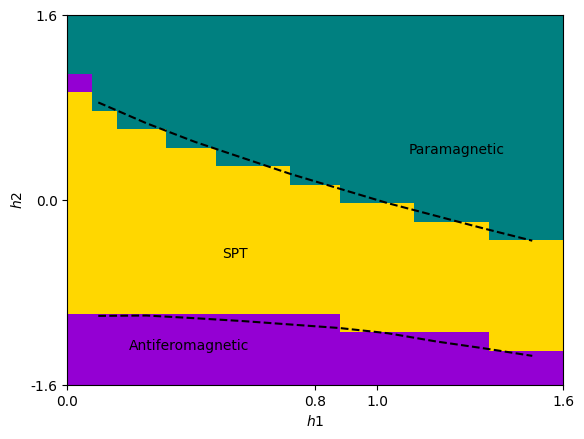

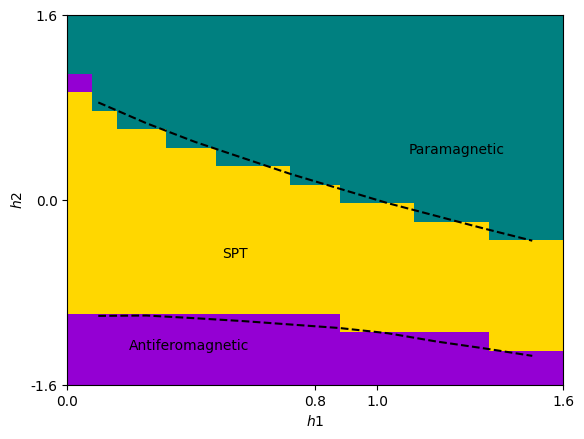

In [18]:
phase_diagram(cites=51, bond_dim=150, keep=[24])
phase_diagram(cites=51, bond_dim=150, keep=[24,25])
phase_diagram(cites=51, bond_dim=150, keep=[24,25,26])
phase_diagram(cites=51, bond_dim=150, keep=[24,25,26,27])
phase_diagram(cites=51, bond_dim=150, keep=[24,25,26,27,28])
phase_diagram(cites=51, bond_dim=150, keep=[24,25,26,27,28,29])

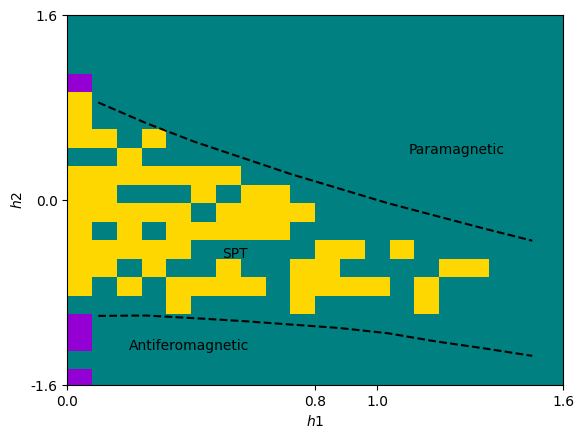

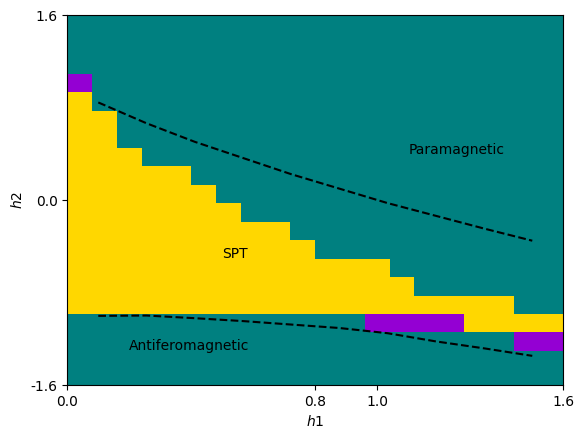

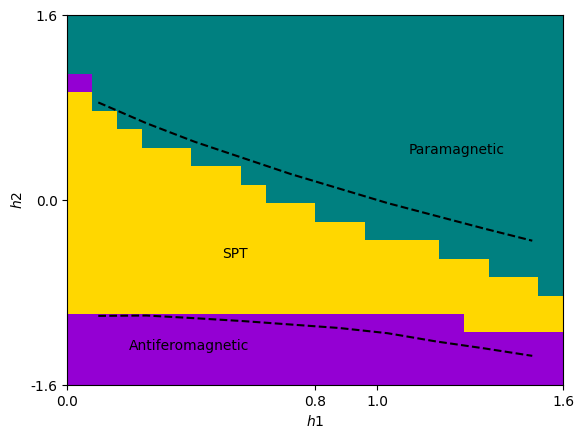

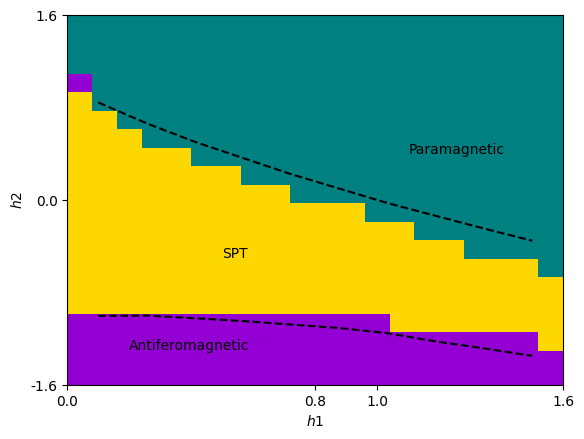

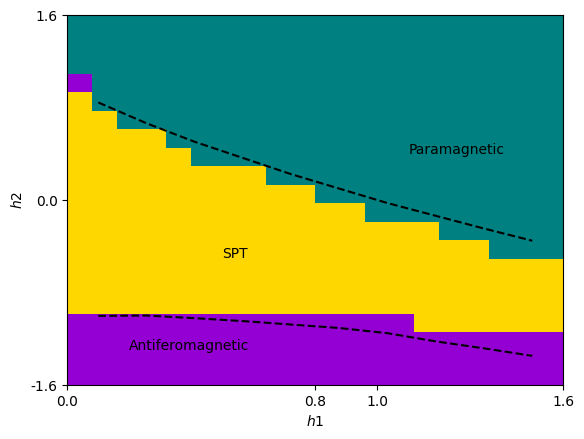

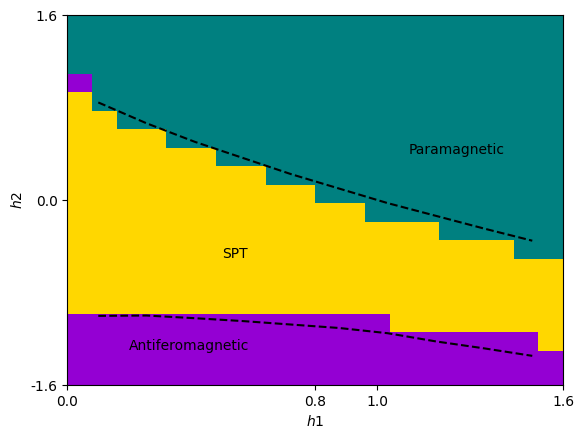

In [19]:
phase_diagram(cites=31, bond_dim=150, keep=[0])
phase_diagram(cites=31, bond_dim=150, keep=[0,1])
phase_diagram(cites=31, bond_dim=150, keep=[0,1,2])
phase_diagram(cites=31, bond_dim=150, keep=[0,1,2,3])
phase_diagram(cites=31, bond_dim=150, keep=[0,1,2,3,4])
phase_diagram(cites=31, bond_dim=150, keep=[0,1,2,3,4,5])

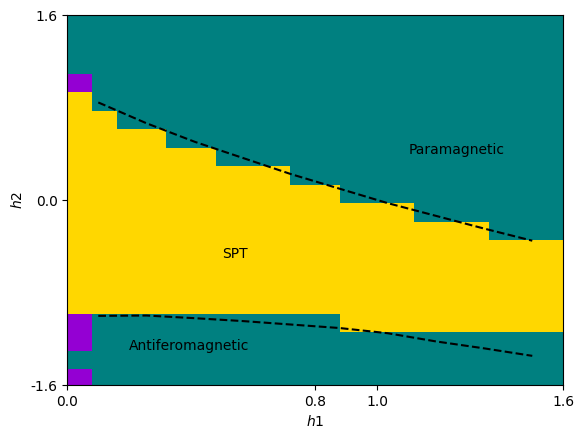

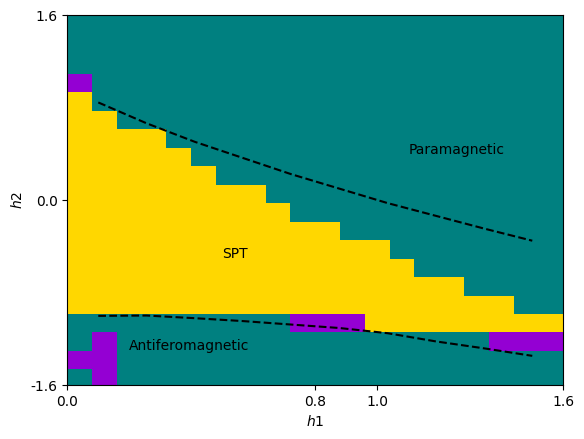

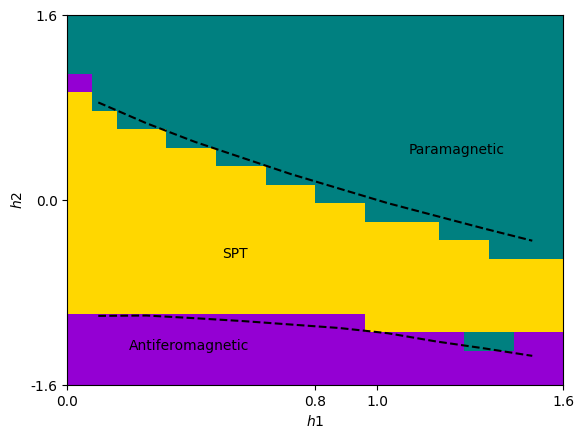

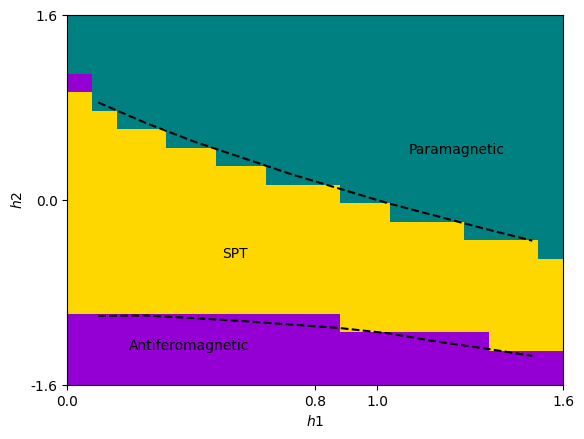

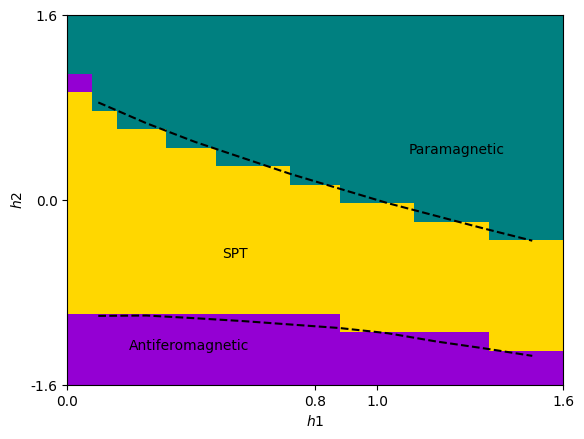

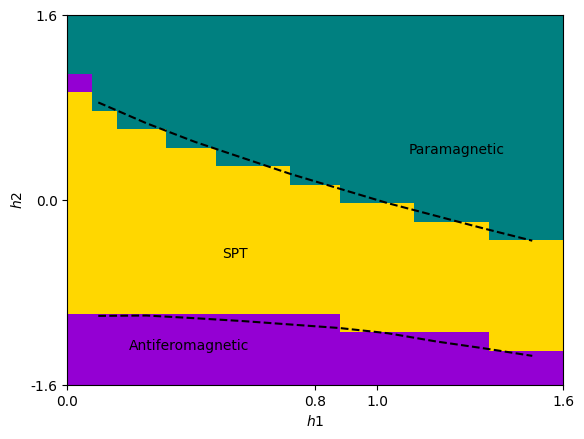

In [20]:
phase_diagram(cites=31, bond_dim=150, keep=[20])
phase_diagram(cites=31, bond_dim=150, keep=[20,21])
phase_diagram(cites=31, bond_dim=150, keep=[20,21,22])
phase_diagram(cites=31, bond_dim=150, keep=[20,21,22,23])
phase_diagram(cites=31, bond_dim=150, keep=[20,21,22,23,24])
phase_diagram(cites=31, bond_dim=150, keep=[20,21,22,23,24,25])

In [2]:
path = f"/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L=51_Bond=150/kernel_partial_keep_from_0_to_3"
file_path_kernel_train_DMRG= os.path.join(path, f"kernel_train_Haldane_DMRG_partial_from_0_to_3_spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, f"kernel_test_Haldane_DMRG_partial_from_0_to_3_spins.hdf5")

In [3]:
with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

In [7]:
np.flipud(pd.read_csv('scatter_points.csv', index_col=0)).reshape(400,)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0

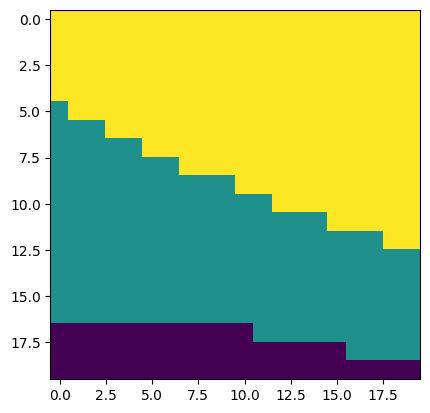

In [4]:
plt.imshow(np.flipud(pd.read_csv('scatter_points.csv', index_col=0)))

In [39]:
def accuracy(keep, size_trainset):

    y_true = np.flipud(pd.read_csv('scatter_points.csv', index_col=0)).reshape(400)
    path = f"/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={size_trainset}_Bond=150/kernel_partial_keep_from_{keep[0]}_to_{keep[-1]}"
    file_path_kernel_train_DMRG= os.path.join(path, f"kernel_train_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")
    file_path_kernel_test_DMRG= os.path.join(path, f"kernel_test_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")

    with h5py.File(file_path_kernel_train_DMRG, "r") as f:
        kernel_train = f["gram_train_DMRG_partial"][:] 

    with h5py.File(file_path_kernel_test_DMRG, "r") as f:
        kernel_test = f["gram_test_DMRG_partial"][:] 

    path = f'/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={size_trainset}_Bond=150/train_set_DMRG and tragets.pkl'

    with open(path, "rb") as f:
        target = pickle.load(f)[1] 

    clf = svm.SVC(kernel='precomputed')
    clf.fit(kernel_train, target) 
    y_pred = np.rot90(clf.predict(kernel_test).reshape(20,20)).reshape(400,)

    score = metrics.accuracy_score(y_true, y_pred)

    return score

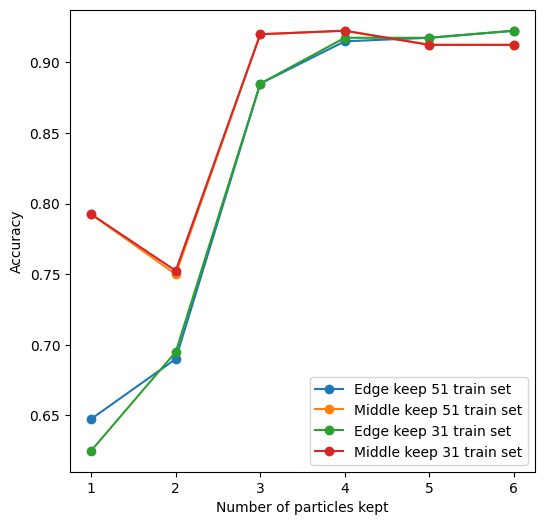

In [40]:
a51b = accuracy(keep=[0], size_trainset=51)
b51b = accuracy(keep=[0,1], size_trainset=51)
c51b = accuracy(keep=[0,1,2], size_trainset=51)
d51b = accuracy(keep=[0,1,2,3], size_trainset=51)
e51b = accuracy(keep=[0,1,2,3,4], size_trainset=51)
f51b = accuracy(keep=[0,1,2,3,4,5], size_trainset=51)

a51m = accuracy(keep=[24], size_trainset=51)
b51m = accuracy(keep=[24,25], size_trainset=51)
c51m = accuracy(keep=[24,25,26], size_trainset=51)
d51m = accuracy(keep=[24,25,26,27], size_trainset=51)
e51m = accuracy(keep=[24,25,26,27,28], size_trainset=51)
f51m = accuracy(keep=[24,25,26,27,28,29], size_trainset=51)

a31b = accuracy(keep=[0], size_trainset=31)
b31b = accuracy(keep=[0,1], size_trainset=31)
c31b = accuracy(keep=[0,1,2], size_trainset=31)
d31b = accuracy(keep=[0,1,2,3], size_trainset=31)
e31b = accuracy(keep=[0,1,2,3,4], size_trainset=31)
f31b = accuracy(keep=[0,1,2,3,4,5], size_trainset=31)

a31m = accuracy(keep=[20], size_trainset=31)
b31m = accuracy(keep=[20,21], size_trainset=31)
c31m = accuracy(keep=[20,21,22], size_trainset=31)
d31m = accuracy(keep=[20,21,22,23], size_trainset=31)
e31m = accuracy(keep=[20,21,22,23,24], size_trainset=31)
f31m = accuracy(keep=[20,21,22,23,24,25], size_trainset=31)

x51b = [1, 2, 3, 4, 5, 6]
y51b = [a51b, b51b, c51b, d51b, e51b, f51b]
x51m = [1, 2, 3, 4, 5, 6]
y51m = [a51m, b51m, c51m, d51m , e51m, f51m]
x31b = [1, 2, 3, 4, 5, 6]
y31b = [a31b, b31b, c31b, d31b, e31b, f31b]
x31m = [1, 2, 3, 4, 5, 6]
y31m = [a31m, b31m, c31m, d31m, e31m, f31m]
plt.figure(figsize=(6, 6))
plt.plot(x51b, y51b, marker = 'o' ,label = 'Edge keep 51 train set')  
plt.plot(x51m, y51m, marker= 'o', label = 'Middle keep 51 train set')
plt.plot(x31b, y31b, marker = 'o', label = 'Edge keep 31 train set')
plt.plot(x31m, y31m,marker = 'o', label='Middle keep 31 train set')
plt.legend()
plt.xlabel("Number of particles kept")
plt.ylabel("Accuracy")
#plt.title("Accuracy vs. Number of sites Kept")
plt.savefig('accuracy_vs_sites')
plt.show()

In [30]:
def accuracy_topological(keep, size_trainset):
    
    y_true = list(np.flipud(pd.read_csv('scatter_points.csv', index_col=0)).reshape(400))
    y_true_topological_index = []
    for i in range(len(y_true)):
        if y_true[i] == 0:
            y_true_topological_index.append(i)
    y_true_topological = np.zeros(len(y_true_topological_index))


    path = f"/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={size_trainset}_Bond=150/kernel_partial_keep_from_{keep[0]}_to_{keep[-1]}"
    file_path_kernel_train_DMRG= os.path.join(path, f"kernel_train_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")
    file_path_kernel_test_DMRG= os.path.join(path, f"kernel_test_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")

    with h5py.File(file_path_kernel_train_DMRG, "r") as f:
        kernel_train = f["gram_train_DMRG_partial"][:] 

    with h5py.File(file_path_kernel_test_DMRG, "r") as f:
        kernel_test = f["gram_test_DMRG_partial"][:] 

    path = f'/home/mehran/4th_project_with_UCL/supervised learning/Second_hamiltonian/train_and_testset_for_L={size_trainset}_Bond=150/train_set_DMRG and tragets.pkl'

    with open(path, "rb") as f:
        target = pickle.load(f)[1] 

    clf = svm.SVC(kernel='precomputed')
    clf.fit(kernel_train, target) 
    y_pred = np.rot90(clf.predict(kernel_test).reshape(20,20)).reshape(400,)

    y_pred_topological = []
    for i in y_true_topological_index:
        y_pred_topological.append(y_pred[i])

    score_topological = metrics.accuracy_score(y_true_topological, y_pred_topological)

    return score_topological

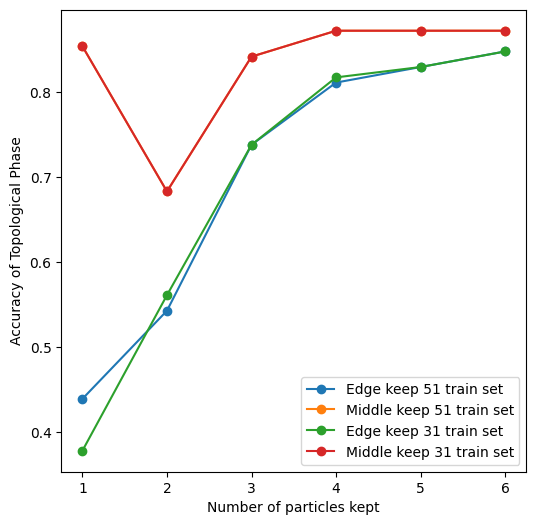

In [37]:
a51b = accuracy_topological(keep=[0], size_trainset=51)
b51b = accuracy_topological(keep=[0,1], size_trainset=51)
c51b = accuracy_topological(keep=[0,1,2], size_trainset=51)
d51b = accuracy_topological(keep=[0,1,2,3], size_trainset=51)
e51b = accuracy_topological(keep=[0,1,2,3,4], size_trainset=51)
f51b = accuracy_topological(keep=[0,1,2,3,4,5], size_trainset=51)

a51m = accuracy_topological(keep=[24], size_trainset=51)
b51m = accuracy_topological(keep=[24,25], size_trainset=51)
c51m = accuracy_topological(keep=[24,25,26], size_trainset=51)
d51m = accuracy_topological(keep=[24,25,26,27], size_trainset=51)
e51m = accuracy_topological(keep=[24,25,26,27,28], size_trainset=51)
f51m = accuracy_topological(keep=[24,25,26,27,28,29], size_trainset=51)

a31b = accuracy_topological(keep=[0], size_trainset=31)
b31b = accuracy_topological(keep=[0,1], size_trainset=31)
c31b = accuracy_topological(keep=[0,1,2], size_trainset=31)
d31b = accuracy_topological(keep=[0,1,2,3], size_trainset=31)
e31b = accuracy_topological(keep=[0,1,2,3,4], size_trainset=31)
f31b = accuracy_topological(keep=[0,1,2,3,4,5], size_trainset=31)

a31m = accuracy_topological(keep=[20], size_trainset=31)
b31m = accuracy_topological(keep=[20,21], size_trainset=31)
c31m = accuracy_topological(keep=[20,21,22], size_trainset=31)
d31m = accuracy_topological(keep=[20,21,22,23], size_trainset=31)
e31m = accuracy_topological(keep=[20,21,22,23,24], size_trainset=31)
f31m = accuracy_topological(keep=[20,21,22,23,24,25], size_trainset=31)

x51b = [1, 2, 3, 4, 5, 6]
y51b = [a51b, b51b, c51b, d51b, e51b, f51b]
x51m = [1, 2, 3, 4, 5, 6]
y51m = [a51m, b51m, c51m, d51m , e51m, f51m]
x31b = [1, 2, 3, 4, 5, 6]
y31b = [a31b, b31b, c31b, d31b, e31b, f31b]
x31m = [1, 2, 3, 4, 5, 6]
y31m = [a31m, b31m, c31m, d31m, e31m, f31m]
plt.figure(figsize=(6, 6))
plt.plot(x51b, y51b, marker = 'o' ,label = 'Edge keep 51 train set')  
plt.plot(x51m, y51m, marker= 'o', label = 'Middle keep 51 train set')
plt.plot(x31b, y31b, marker = 'o', label = 'Edge keep 31 train set')
plt.plot(x31m, y31m,marker = 'o', label='Middle keep 31 train set')
plt.legend()
plt.xlabel("Number of particles kept")
plt.ylabel("Accuracy of Topological Phase")
#plt.title("Accuracy vs. Number of sites Kept")
plt.savefig('topological_accuracy_vs_sites.png')
plt.show()

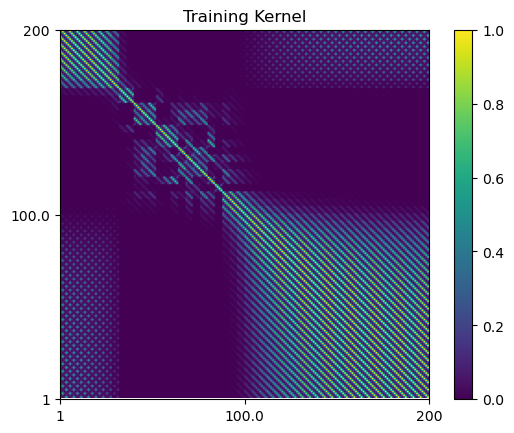

In [7]:
plt.imshow(gtrain,cmap="viridis");
d = gtrain.shape[0];
plt.xticks([-0.5, (d/2), (d)], [f"{1}", f"{(d/2)}", f"{(d)}"]);
plt.yticks([-0.5, (d/2), (d)], [f"{(d)}", f"{(d/2)}", f"{1}"]);
plt.title("Training Kernel")
plt.colorbar();
plt.savefig('Training Kernel.png')
plt.show();

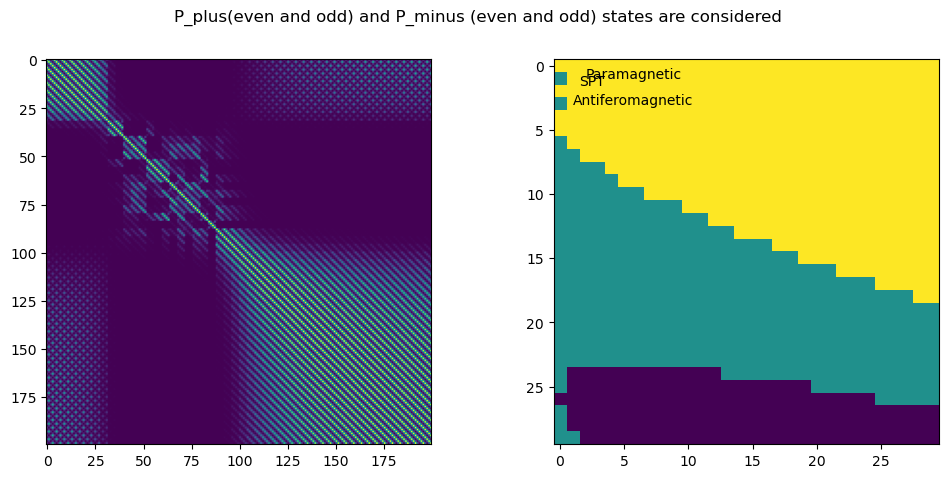

In [8]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].imshow(gtrain)
mat = y_pred.reshape(ls_train,ls_train)
ax[1].imshow(np.rot90(mat))
ax[1].text(2,1,'Paramagnetic')
ax[1].text(1.5,1.5,'SPT')
ax[1].text(1,3,'Antiferomagnetic')
fig.suptitle('P_plus(even and odd) and P_minus (even and odd) states are considered')
plt.show()